In [1]:
import numpy as np
from scipy.stats import multivariate_normal, invwishart, invgamma, wishart, dirichlet, norm
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic data

## Sample generation

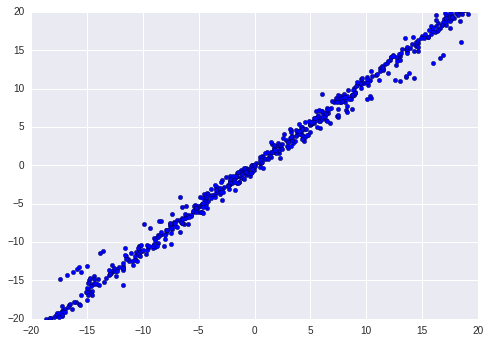

pi: [[ 0.0641794 ]
 [ 0.83623738]
 [ 0.09958322]]

mu: [[ 15.8361384   16.21914323]
 [ 10.6536817   11.72959641]
 [  9.07517945   7.73238431]]

cov: [[[  0.64320211   0.77569616]
  [  0.77569616   0.94345915]]

 [[ 12.55528783  14.8679709 ]
  [ 14.8679709   17.61622682]]

 [[  2.00402046   1.90864978]
  [  1.90864978   1.82315897]]]

assigment counts 0: 62
assigment counts 1: 849
assigment counts 2: 89


In [2]:
N = 1000
d = 2
K = 3

X = multivariate_normal.rvs(mean=[0., 0.], cov=2*np.eye(2), size = N)

X_mean = np.mean(X, axis=0)
X_cov = np.cov(X.T)
X_cov_inv = np.linalg.inv(X_cov)

# Hyperparameters
mulinha = multivariate_normal.rvs(mean=X_mean, cov=X_cov)
Sigmalinha = invwishart.rvs(df=d, scale=d * X_cov)
Hlinha = wishart.rvs(df=d, scale=X_cov / d)
sigmalinha = invgamma.rvs(1, 1/d) + d

# Parameters
mu = multivariate_normal.rvs(mean=mulinha, cov=Sigmalinha, size=K).reshape(K, d)
cov_inv = wishart.rvs(df=sigmalinha, scale=np.linalg.inv(Hlinha), size=K).reshape(K, d, d)
cov = np.linalg.inv(cov_inv)

alpha = invgamma.rvs(1, 1)
pi = dirichlet.rvs(alpha/K * np.ones((K, ))).T
#pi = np.array([0.3, 0.3, 0.4])
ups = 0
delta_sq = 2
omega = 1
theta = 1

z = np.ones((N, ))
phi = np.ones((N, ))
beta = np.ones((N, ))

for n in range(N):
    # select one of the clusters
    k = np.random.choice(range(K), p=pi.ravel())
    z[n] = k
    
    # sample scaling parameters
    phi[n] = norm.rvs(ups, delta_sq)
    beta[n] = invgamma.rvs(omega, theta)
    
    # sample an observation
    X[n] = multivariate_normal.rvs(mean=phi[n] * mu[k], cov=beta[n] * cov[k])
    
plt.scatter(X[:, 0], X[:, 1])
plt.axis([-20, 20, -20, 20])
plt.show()

print("pi: " + str(pi))
print("")
print("mu: " + str(mu))
print("")
print("cov: " + str(cov))
print("")
for i in range(K):
    print("assigment counts " + str(i) + ": " + str(np.count_nonzero(z == i)))

## Clustering
Fit a DPMM with scalings to the generated data and evaluate the obtained clustering with a confusion matrix.